In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns={'Annual Income (k$)':"Income","Spending Score (1-100)":"Score"},inplace=True)

In [4]:
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


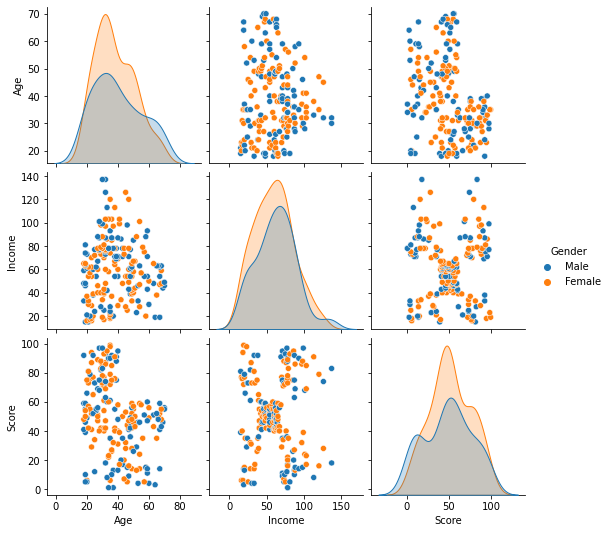

In [6]:
X = df.drop(['CustomerID','Gender'],axis=1)
sns.pairplot(df.drop('CustomerID',axis=1),hue='Gender')
plt.show()

From the above plot we see that gender has no direct relation to segmenting customers, That's why we can drop it and move on which other features which is why we will use X parameters from now

# KMeans

C:\Users\conne\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


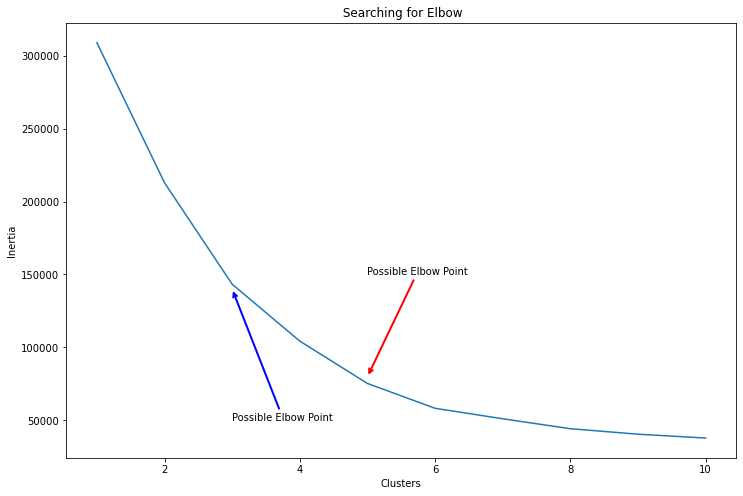

In [24]:
from sklearn.cluster import KMeans
clusters = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i).fit(X)
    clusters.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)),y=clusters,ax=ax)
ax.set_title(" Searching for Elbow")
ax.set_xlabel("Clusters")
ax.set_ylabel("Inertia")
ax.annotate("Possible Elbow Point",xy=(5,80000),xytext=(5,150000),xycoords="data",
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="red",lw=2))
ax.annotate("Possible Elbow Point",xy=(3,140000),xytext=(3,50000),xycoords="data",
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="blue",lw=2))
plt.show()

C:\Users\conne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


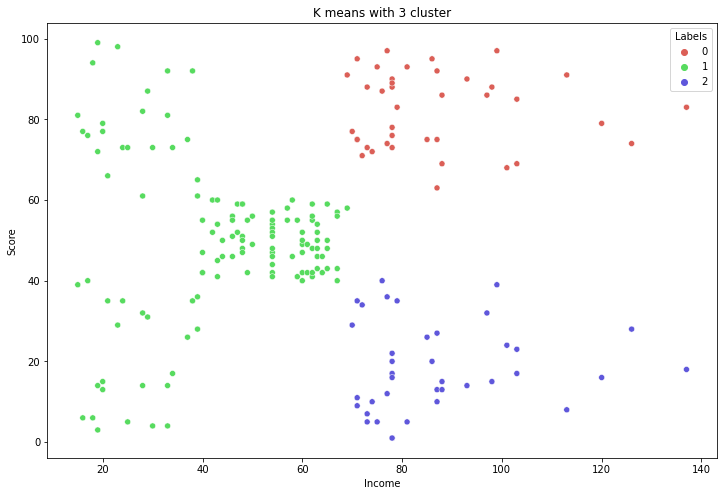

In [26]:
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(X['Income'],X['Score'],hue=X['Labels'],palette=sns.color_palette('hls',3))
plt.title("K means with 3 cluster")
plt.show()

C:\Users\conne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


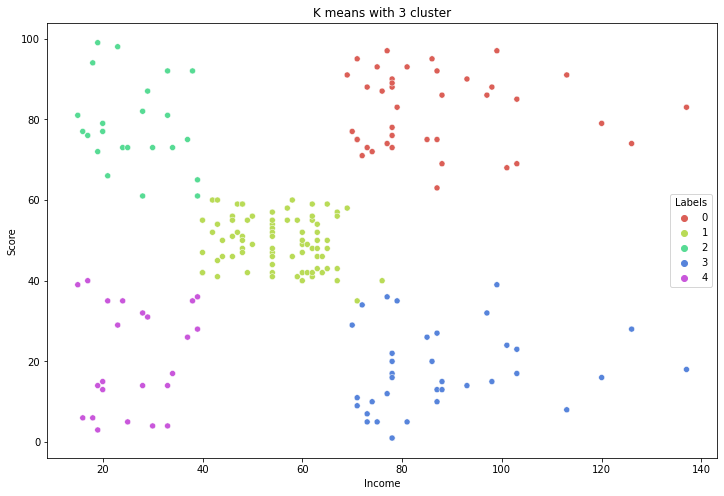

In [28]:
km4 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km4.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(X['Income'],X['Score'],hue=X['Labels'],palette=sns.color_palette('hls',5))
plt.title("K means with 3 cluster")
plt.show()

By judging from the plots we could say that 5 clusters seems better than the 3 ones.

We can analyze out 5 cluster as:
- Label 0: is low income and low spending
- Label 1: is high income and high spending
- Label 2: is mid/avg income and mid spending
- Label 3: is high income and low spending
- Label 4: is low income and high spending

# Hierarchical Clustering

C:\Users\conne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


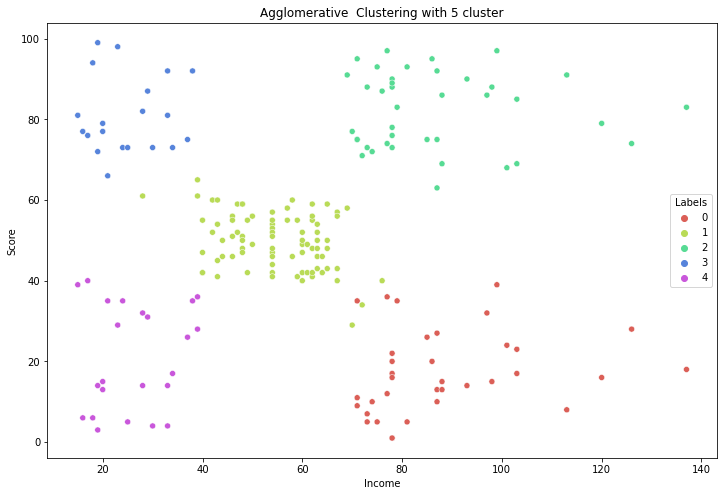

In [29]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=5,linkage='average').fit(X)
X['Labels'] = agglom.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(X['Income'],X['Score'],hue=X['Labels'],palette=sns.color_palette('hls',5))
plt.title("Agglomerative  Clustering with 5 cluster")
plt.show()

# Using Dendrogran

In [30]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist = distance_matrix(X,X)
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.12813496 124.53915047
  130.17296186]
 [ 42.05948169   0.          75.01999733 ... 111.76761606 137.77880824
  122.35195135]
 [ 33.03028913  75.01999733   0.         ... 129.89226305 122.24974438
  143.78456106]
 ...
 [117.12813496 111.76761606 129.89226305 ...   0.          57.10516614
   14.35270009]
 [124.53915047 137.77880824 122.24974438 ...  57.10516614   0.
   65.06150936]
 [130.17296186 122.35195135 143.78456106 ...  14.35270009  65.06150936
    0.        ]]


In [31]:
Z = hierarchy.linkage(dist,'complete')

C:\Users\conne\AppData\Local\Temp/ipykernel_15236/2260399819.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist,'complete')


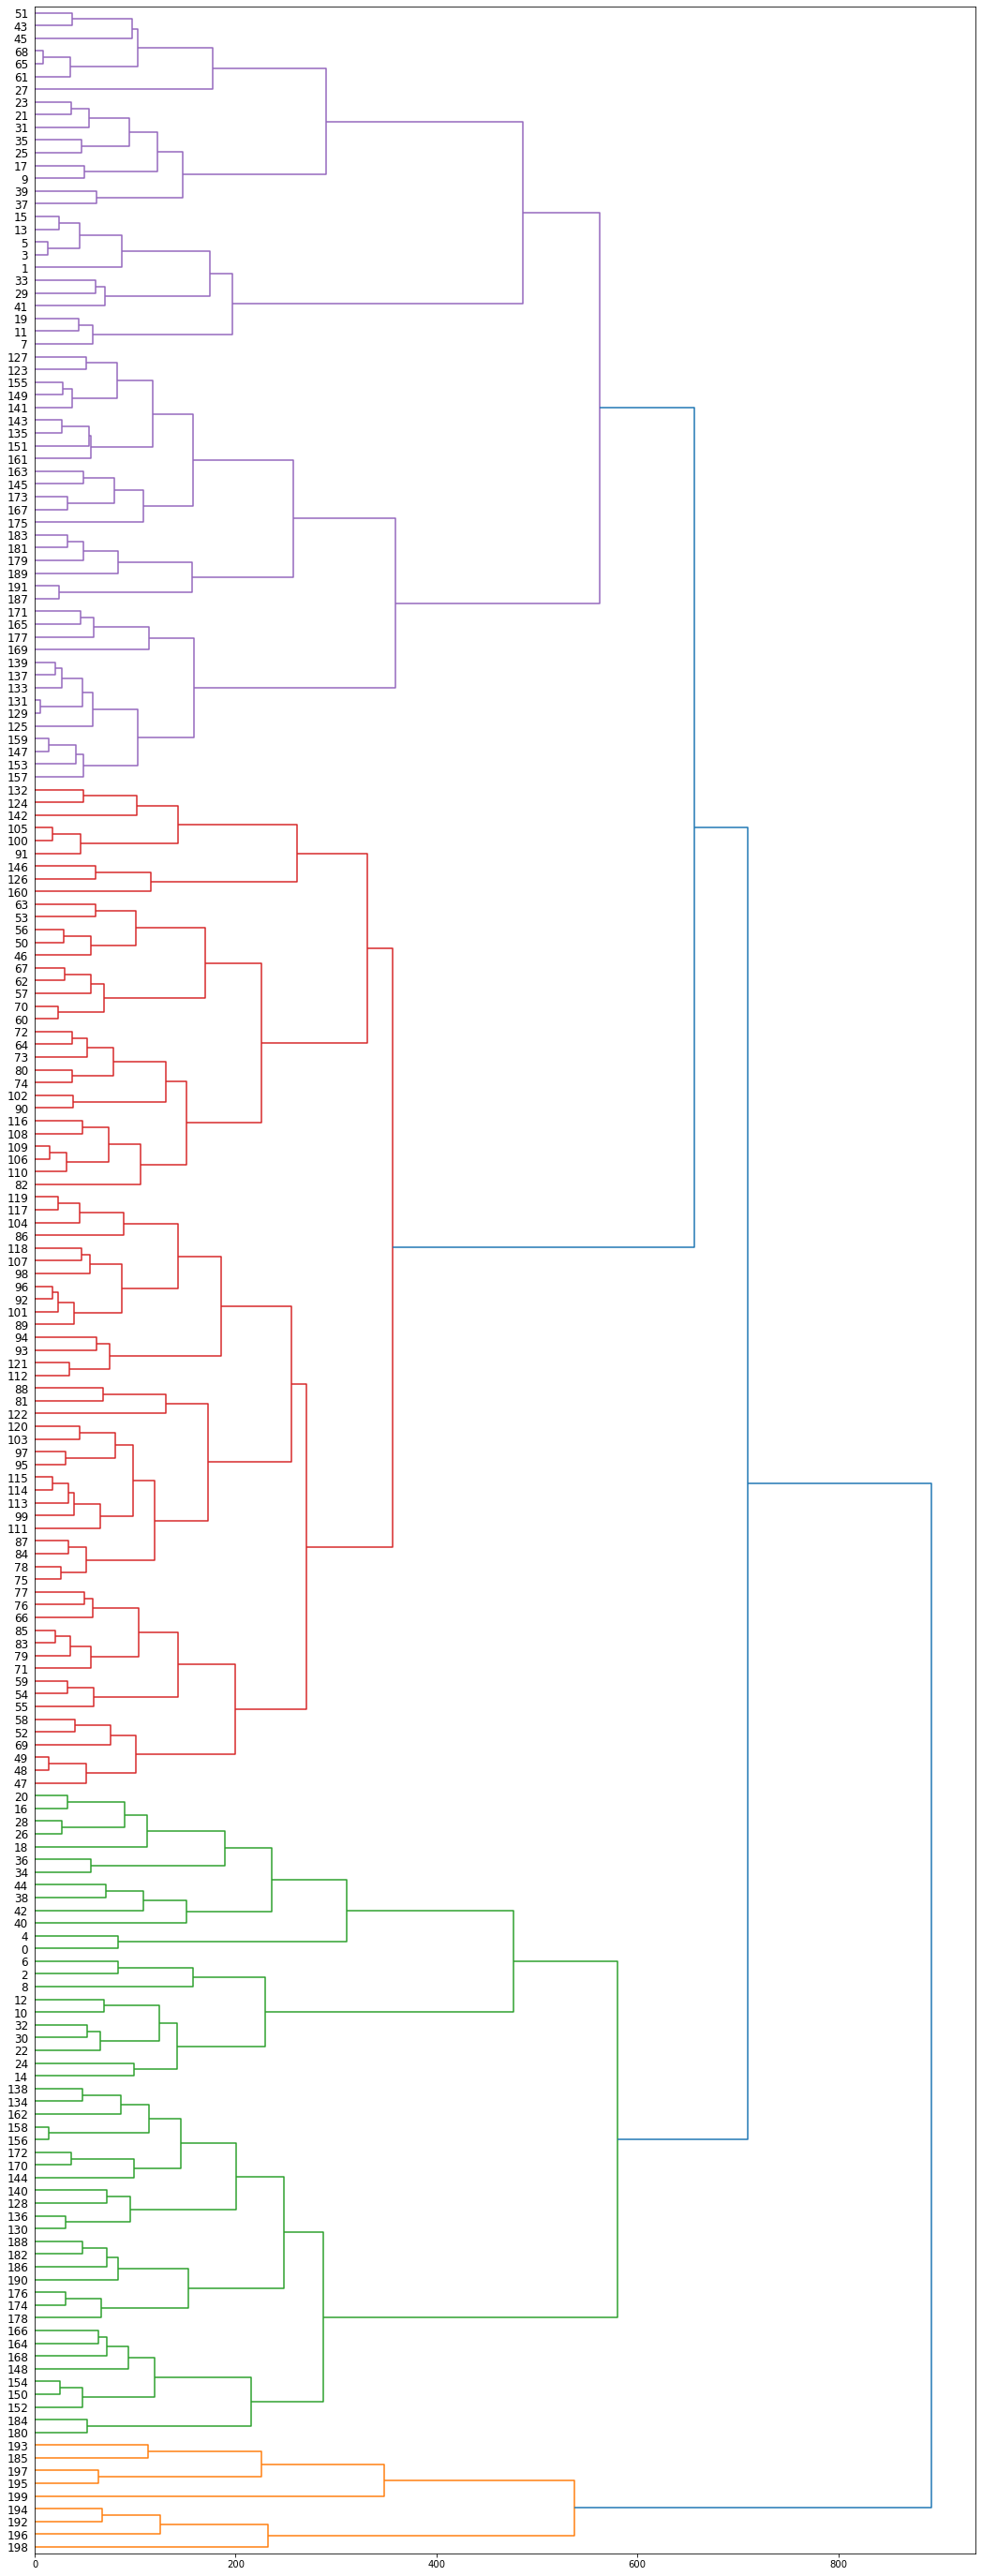

In [32]:
plt.figure(figsize=(18,50))
dendro = hierarchy.dendrogram(Z,leaf_rotation=0,leaf_font_size=12,orientation='right')

C:\Users\conne\AppData\Local\Temp/ipykernel_15236/10068076.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist,'average')


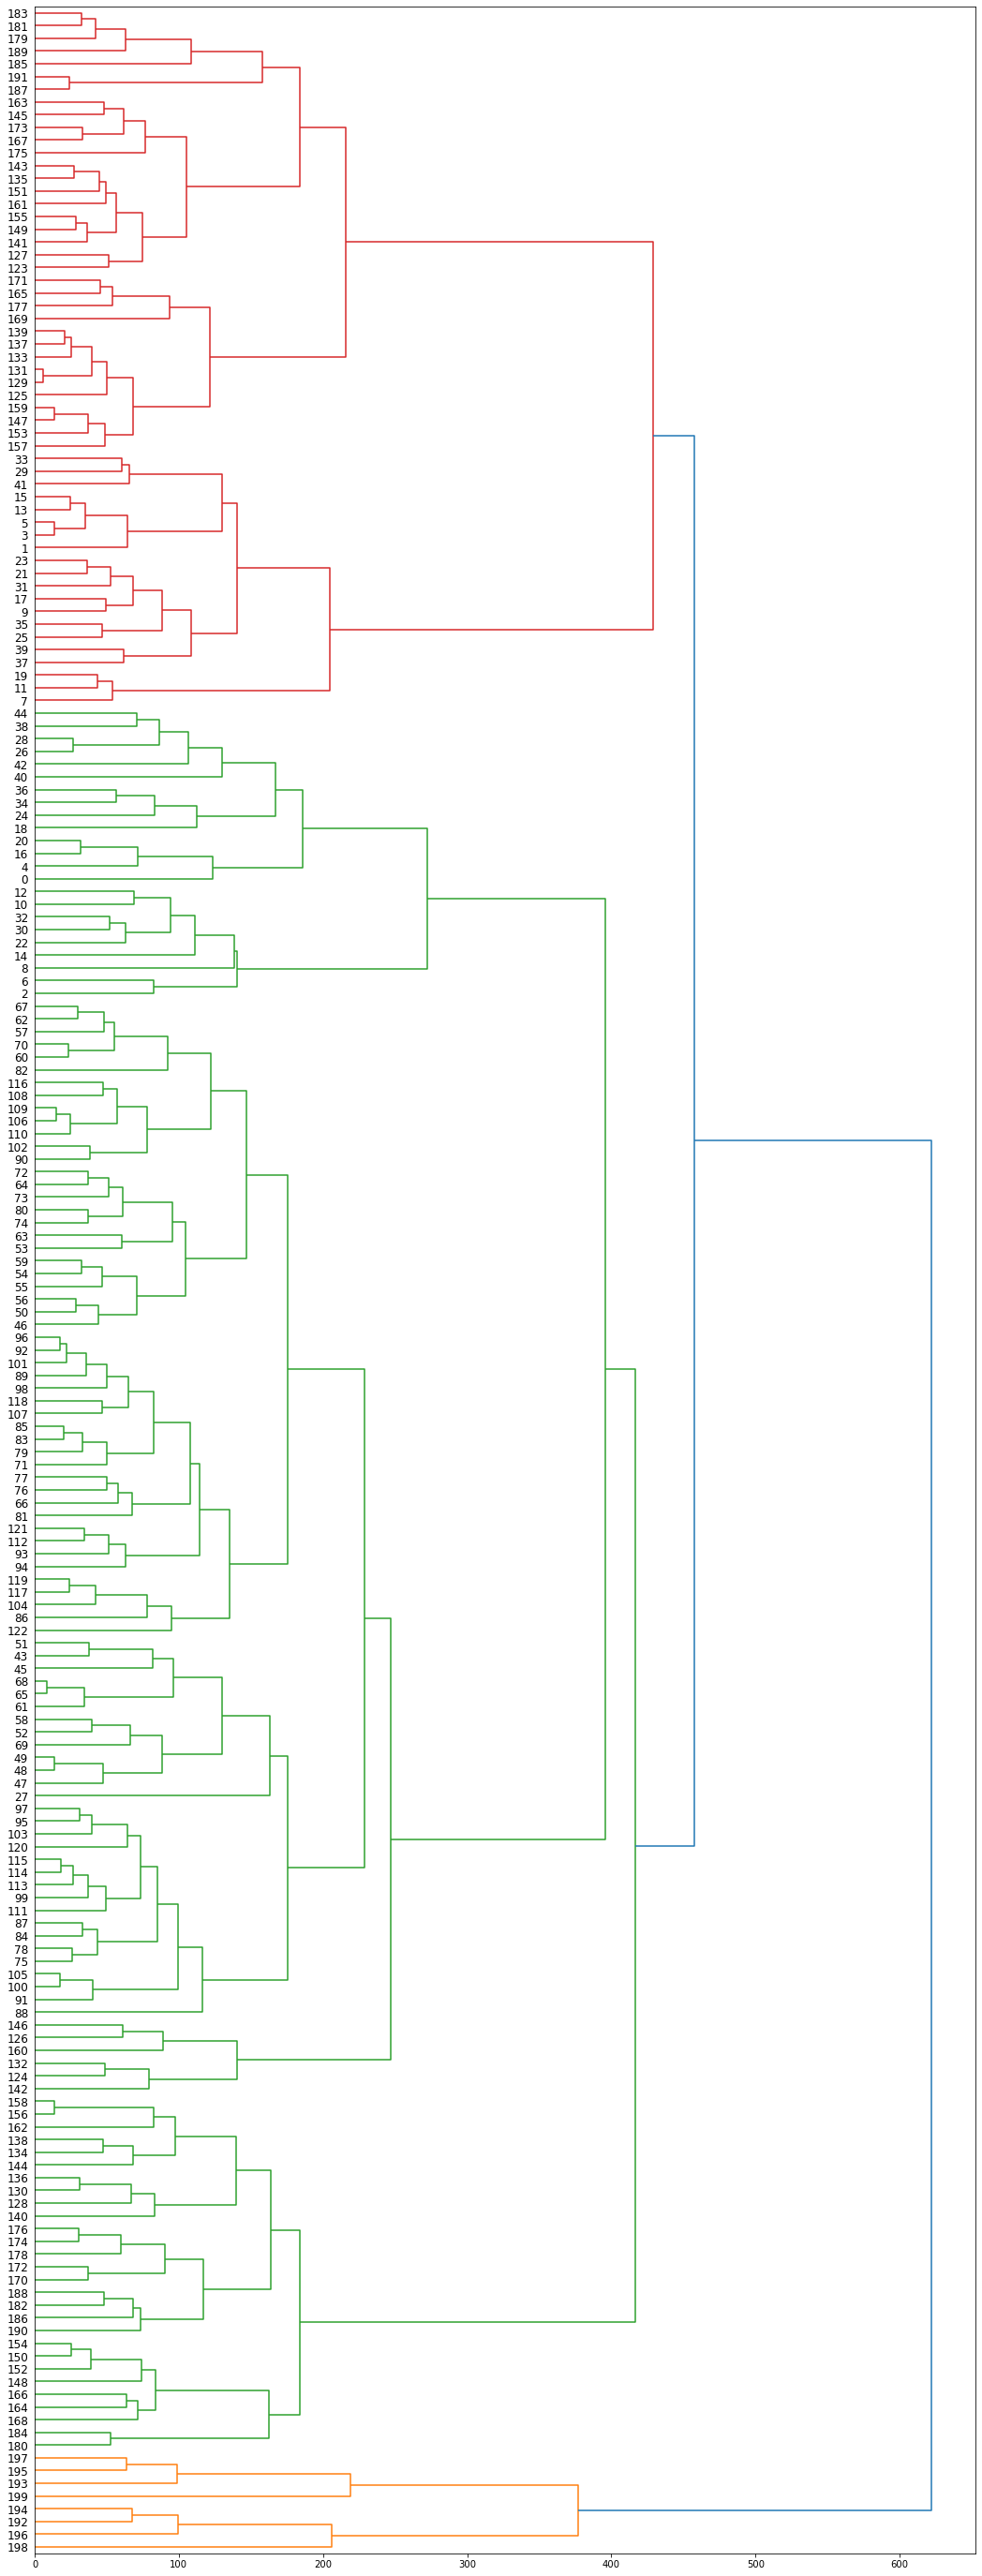

In [33]:
Z = hierarchy.linkage(dist,'average')
plt.figure(figsize=(18,50))
dendro = hierarchy.dendrogram(Z,leaf_rotation=0,leaf_font_size=12,orientation='right')

# DBSCAN

C:\Users\conne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


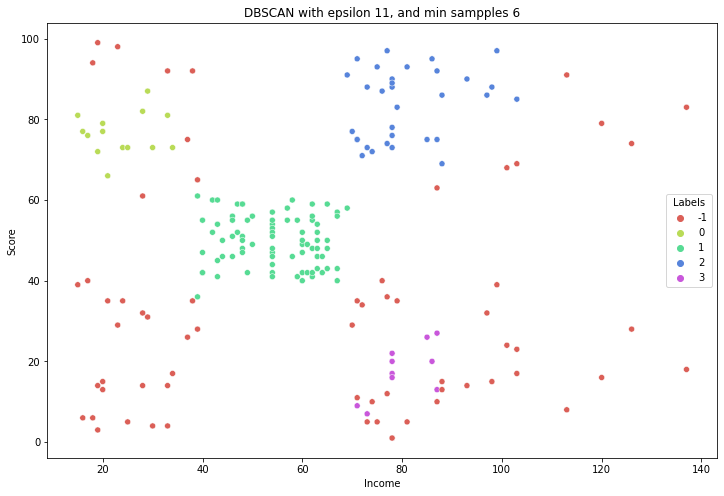

In [34]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=11,min_samples=6).fit(X)
X['Labels'] = db.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(X['Income'],X['Score'],hue=X['Labels'],palette=sns.color_palette('hls',np.unique(db.labels_).shape[0]))
plt.title("DBSCAN with epsilon 11, and min sampples 6")
plt.show()


C:\Users\conne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\conne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\conne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\conne\anacond

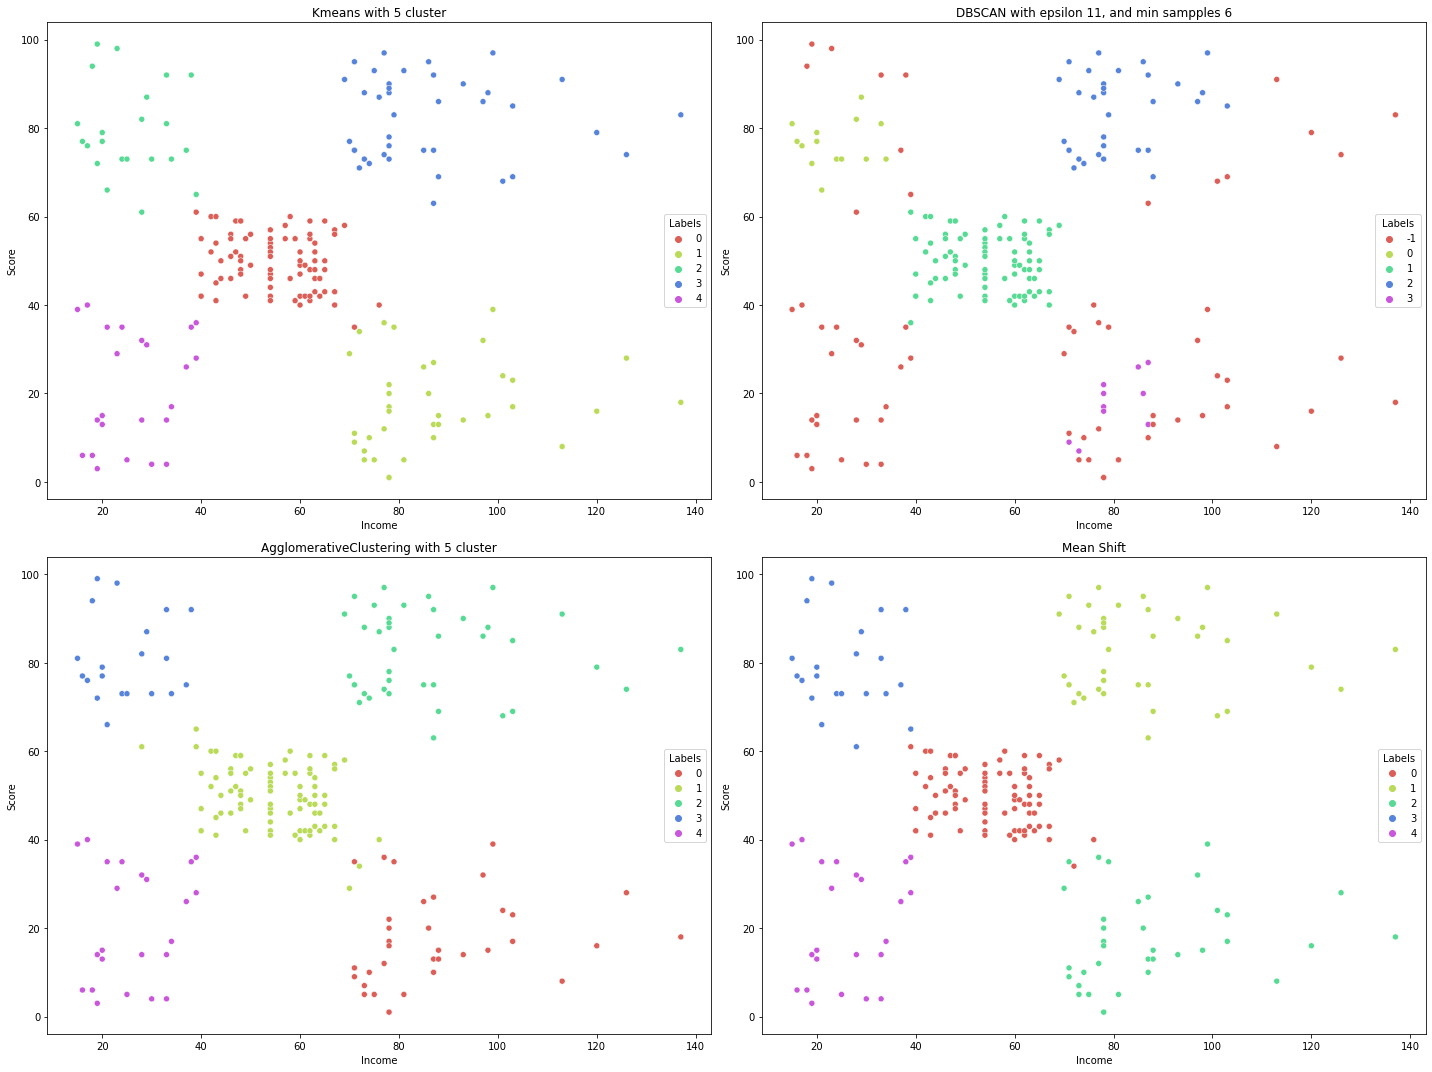

In [40]:
fig = plt.figure(figsize=(20,15))

## Kmeans ##
ax = fig.add_subplot(221)
km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_
sns.scatterplot(X['Income'],X['Score'],hue=X['Labels'],palette=sns.color_palette('hls',5),ax=ax)
ax.set_title("Kmeans with 5 cluster")
## Agglomerative Clustering ##
ax = fig.add_subplot(223)
agglom = AgglomerativeClustering(n_clusters=5,linkage='average').fit(X)
X['Labels'] = agglom.labels_
sns.scatterplot(X['Income'],X['Score'],hue=X['Labels'],palette=sns.color_palette('hls',5),ax=ax)
ax.set_title("AgglomerativeClustering with 5 cluster")
## DBSCAN ##
ax = fig.add_subplot(222)
db = DBSCAN(eps=11,min_samples=6).fit(X)
X['Labels'] = db.labels_
y_means = db.fit_predict(X)
y_means = [x for x in y_means if x!= -1]
sns.scatterplot(X['Income'],X['Score'],hue=X['Labels'],palette=sns.color_palette('hls',np.unique(db.labels_).shape[0]),ax=ax)
ax.set_title("DBSCAN with epsilon 11, and min sampples 6")
## Mean Shift ##
ax = fig.add_subplot(224)
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X,quantile=0.1)
ms = MeanShift(bandwidth).fit(X)
X['Labels'] = ms.labels_
sns.scatterplot(X['Income'],X['Score'],hue=X['Labels'],palette=sns.color_palette('hls',np.unique(db.labels_).shape[0]),ax=ax)
ax.set_title("Mean Shift")

plt.tight_layout()
plt.show()